In [3]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore Python Warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_df = pd.read_csv(r"E:\Hotel-Booking-Cancellation-Prediction-MLOps\artifacts\raw\train.csv", index_col=0)

df = train_df.copy()

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.shape

(29020, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date    

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [10]:
# Drop 'Booking_ID' column

df = df.drop(columns=['Booking_ID'])

In [11]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'O']

categorical_columns = [col for col in df.columns if df[col].dtype == 'O']

In [12]:
numerical_columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [13]:
categorical_columns

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

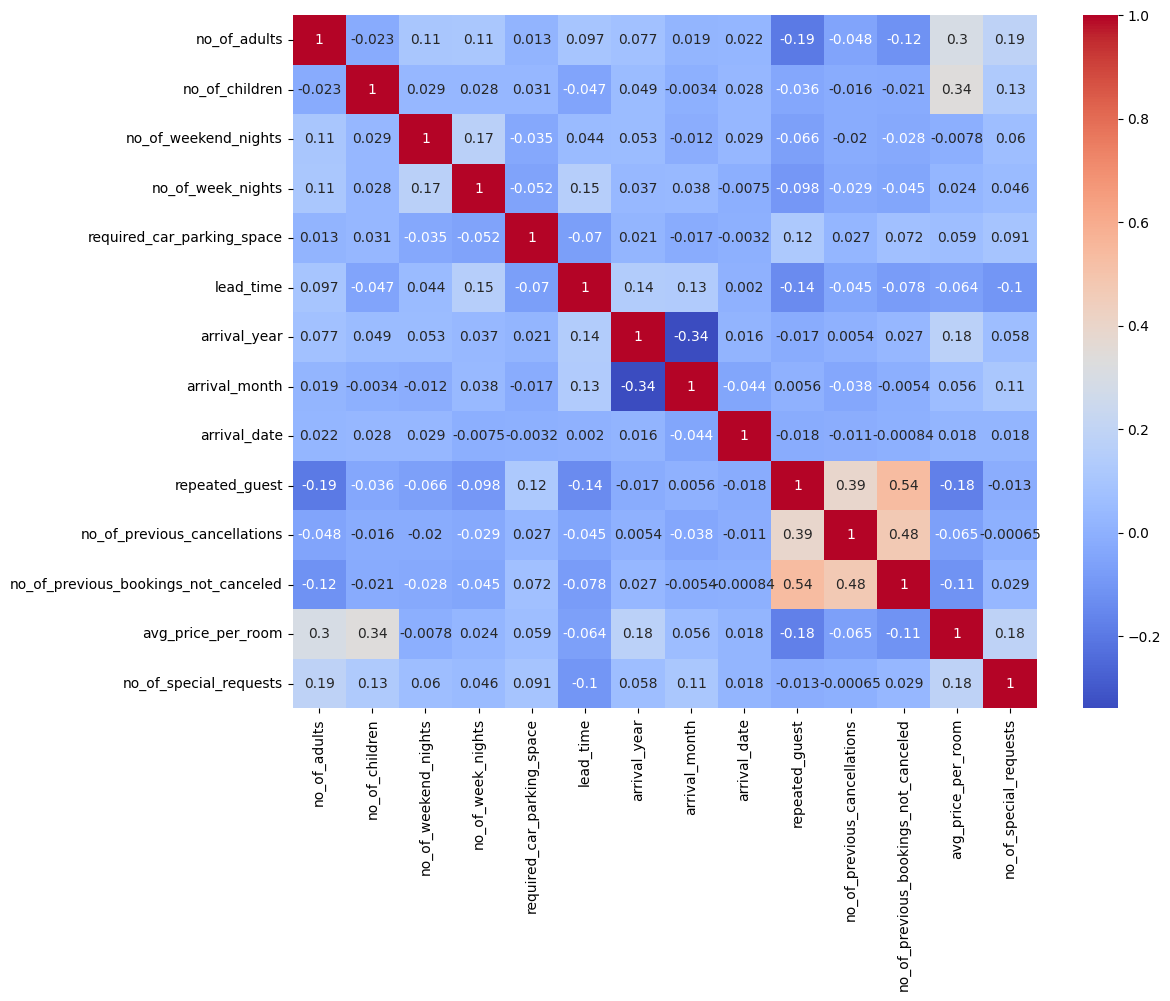

In [14]:
# Correlation

plt.figure(figsize=(12, 9))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Value counts for numerical columns
for col in numerical_columns:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())


Value counts for 'no_of_adults':
no_of_adults
2    20896
1     6154
3     1841
0      116
4       13
Name: count, dtype: int64

Value counts for 'no_of_children':
no_of_children
0     26837
1      1315
2       853
3        12
9         2
10        1
Name: count, dtype: int64

Value counts for 'no_of_weekend_nights':
no_of_weekend_nights
0    13537
1     7981
2     7238
3      126
4       96
5       28
6       14
Name: count, dtype: int64

Value counts for 'no_of_week_nights':
no_of_week_nights
2     9110
1     7627
3     6277
4     2396
0     1904
5     1314
6      147
7       88
10      49
8       43
9       27
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64

Value counts for 'required_car_parking_space':
required_car_parking_space
0    28093
1      927
Name: count, dtype: int64

Value counts for 'lead_time':
lead_time
0      1058
1       844
2       537
3       498
4       492
       ... 
352       1
324       1
341       1
299 

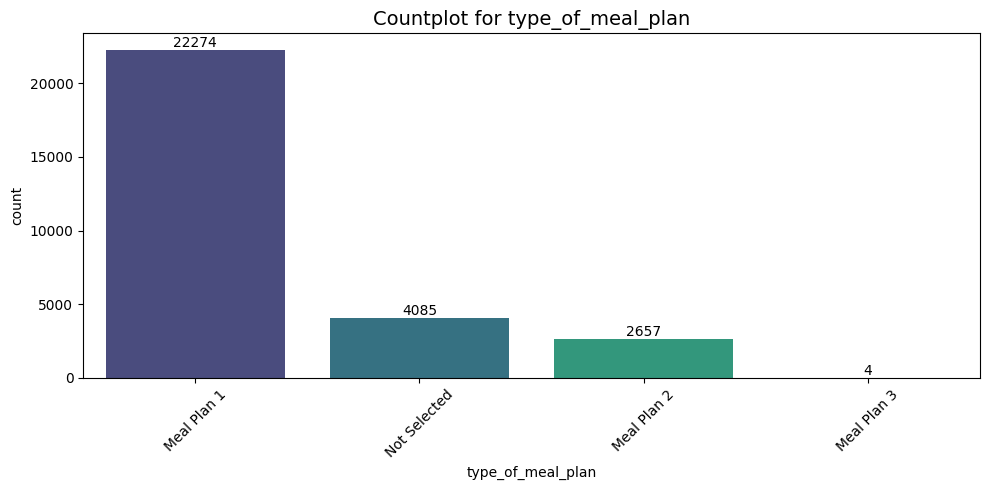

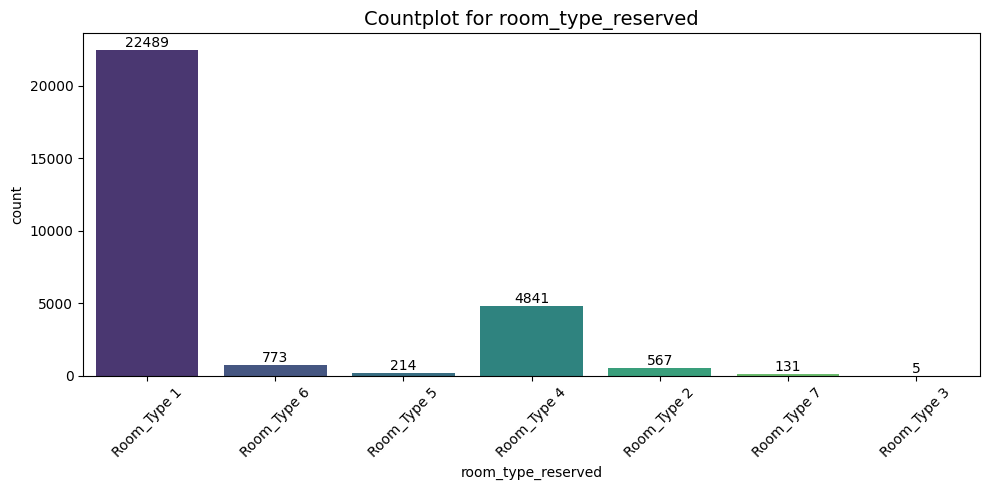

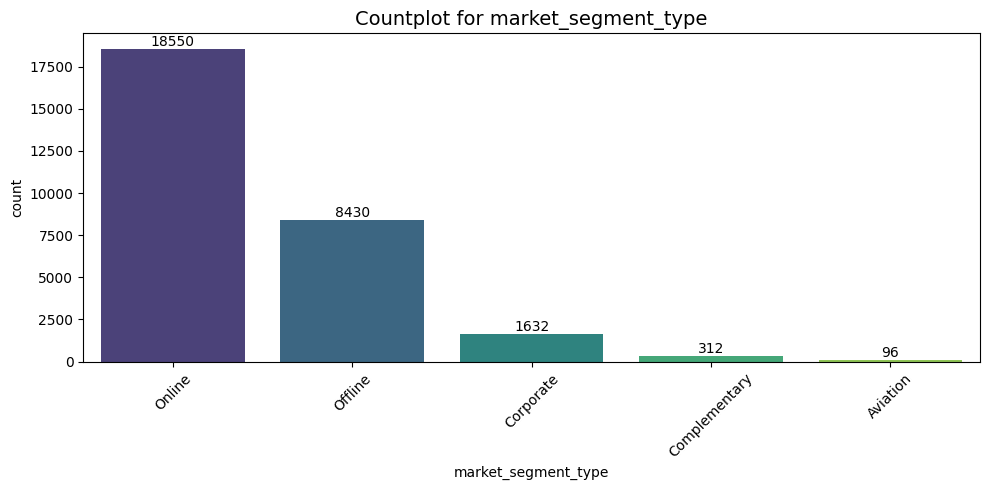

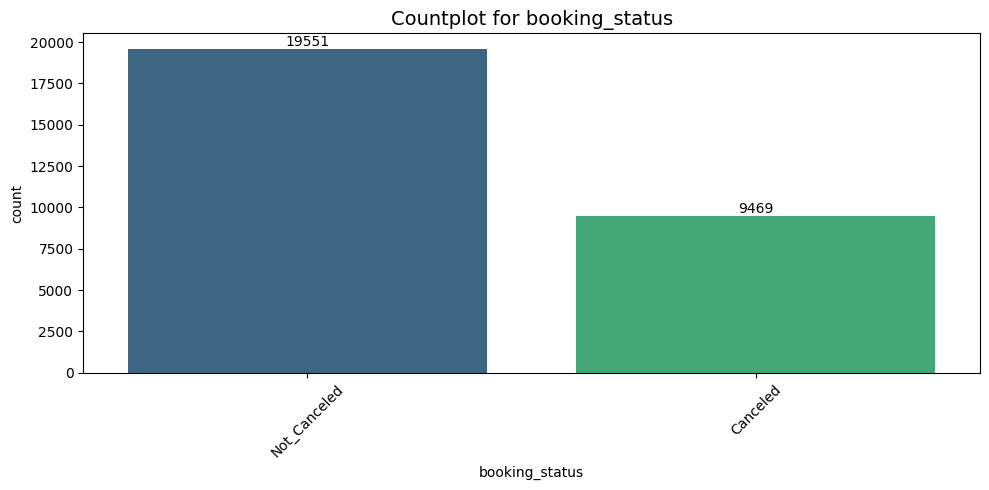

In [16]:
# Countplot for all the categorical columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=col, palette='viridis')
    for bars in ax.containers:
        ax.bar_label(bars)
    plt.title(f'Countplot for {col}', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

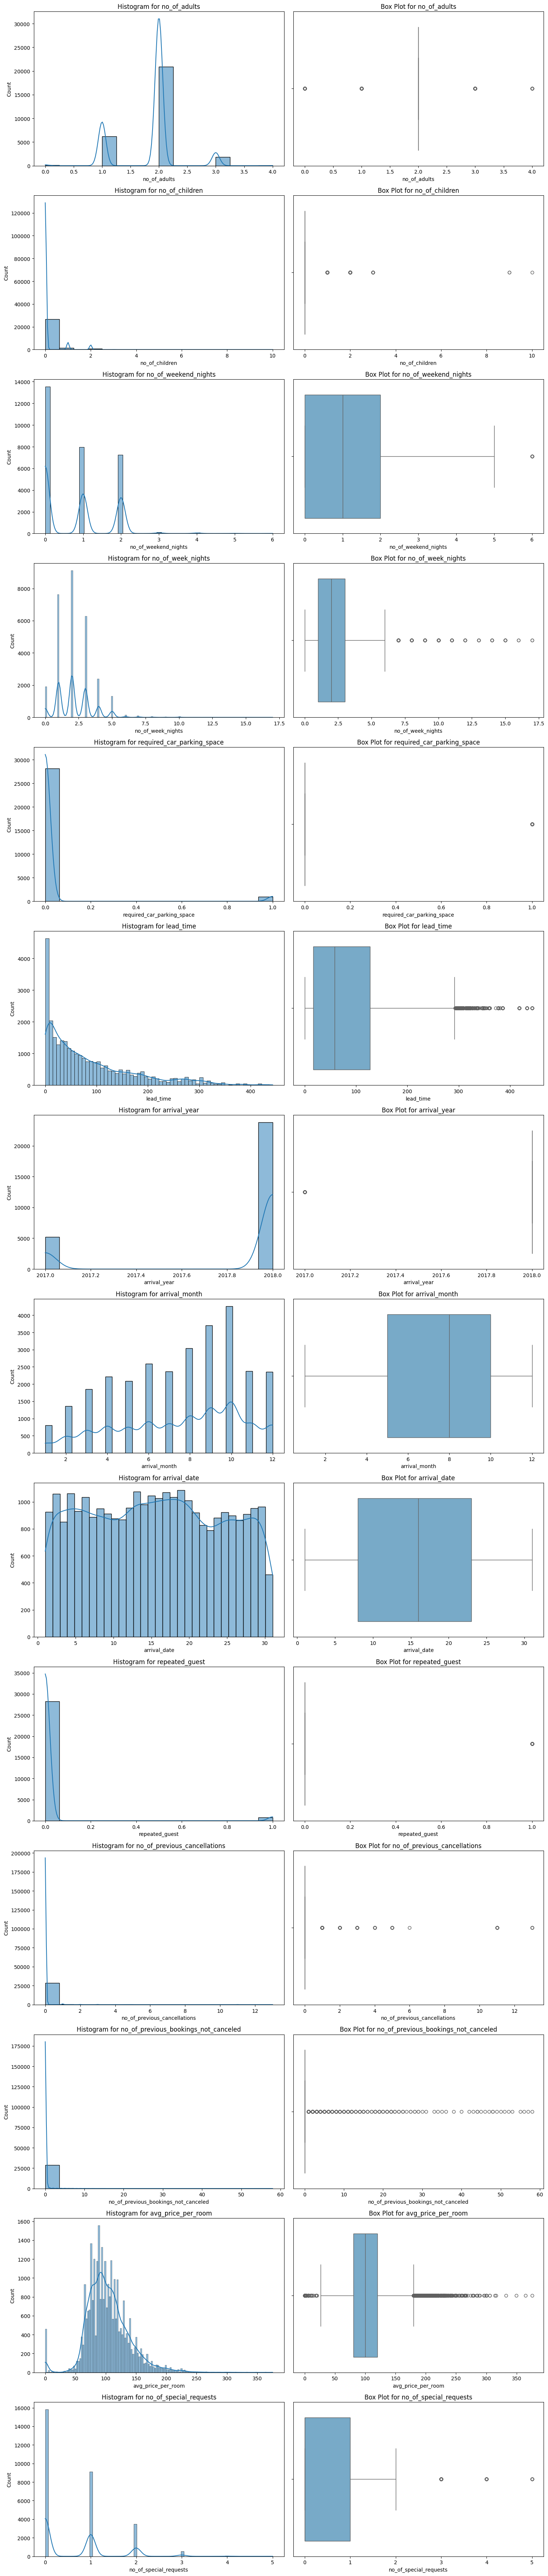

In [17]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

num_plot_dist(df, numerical_columns)

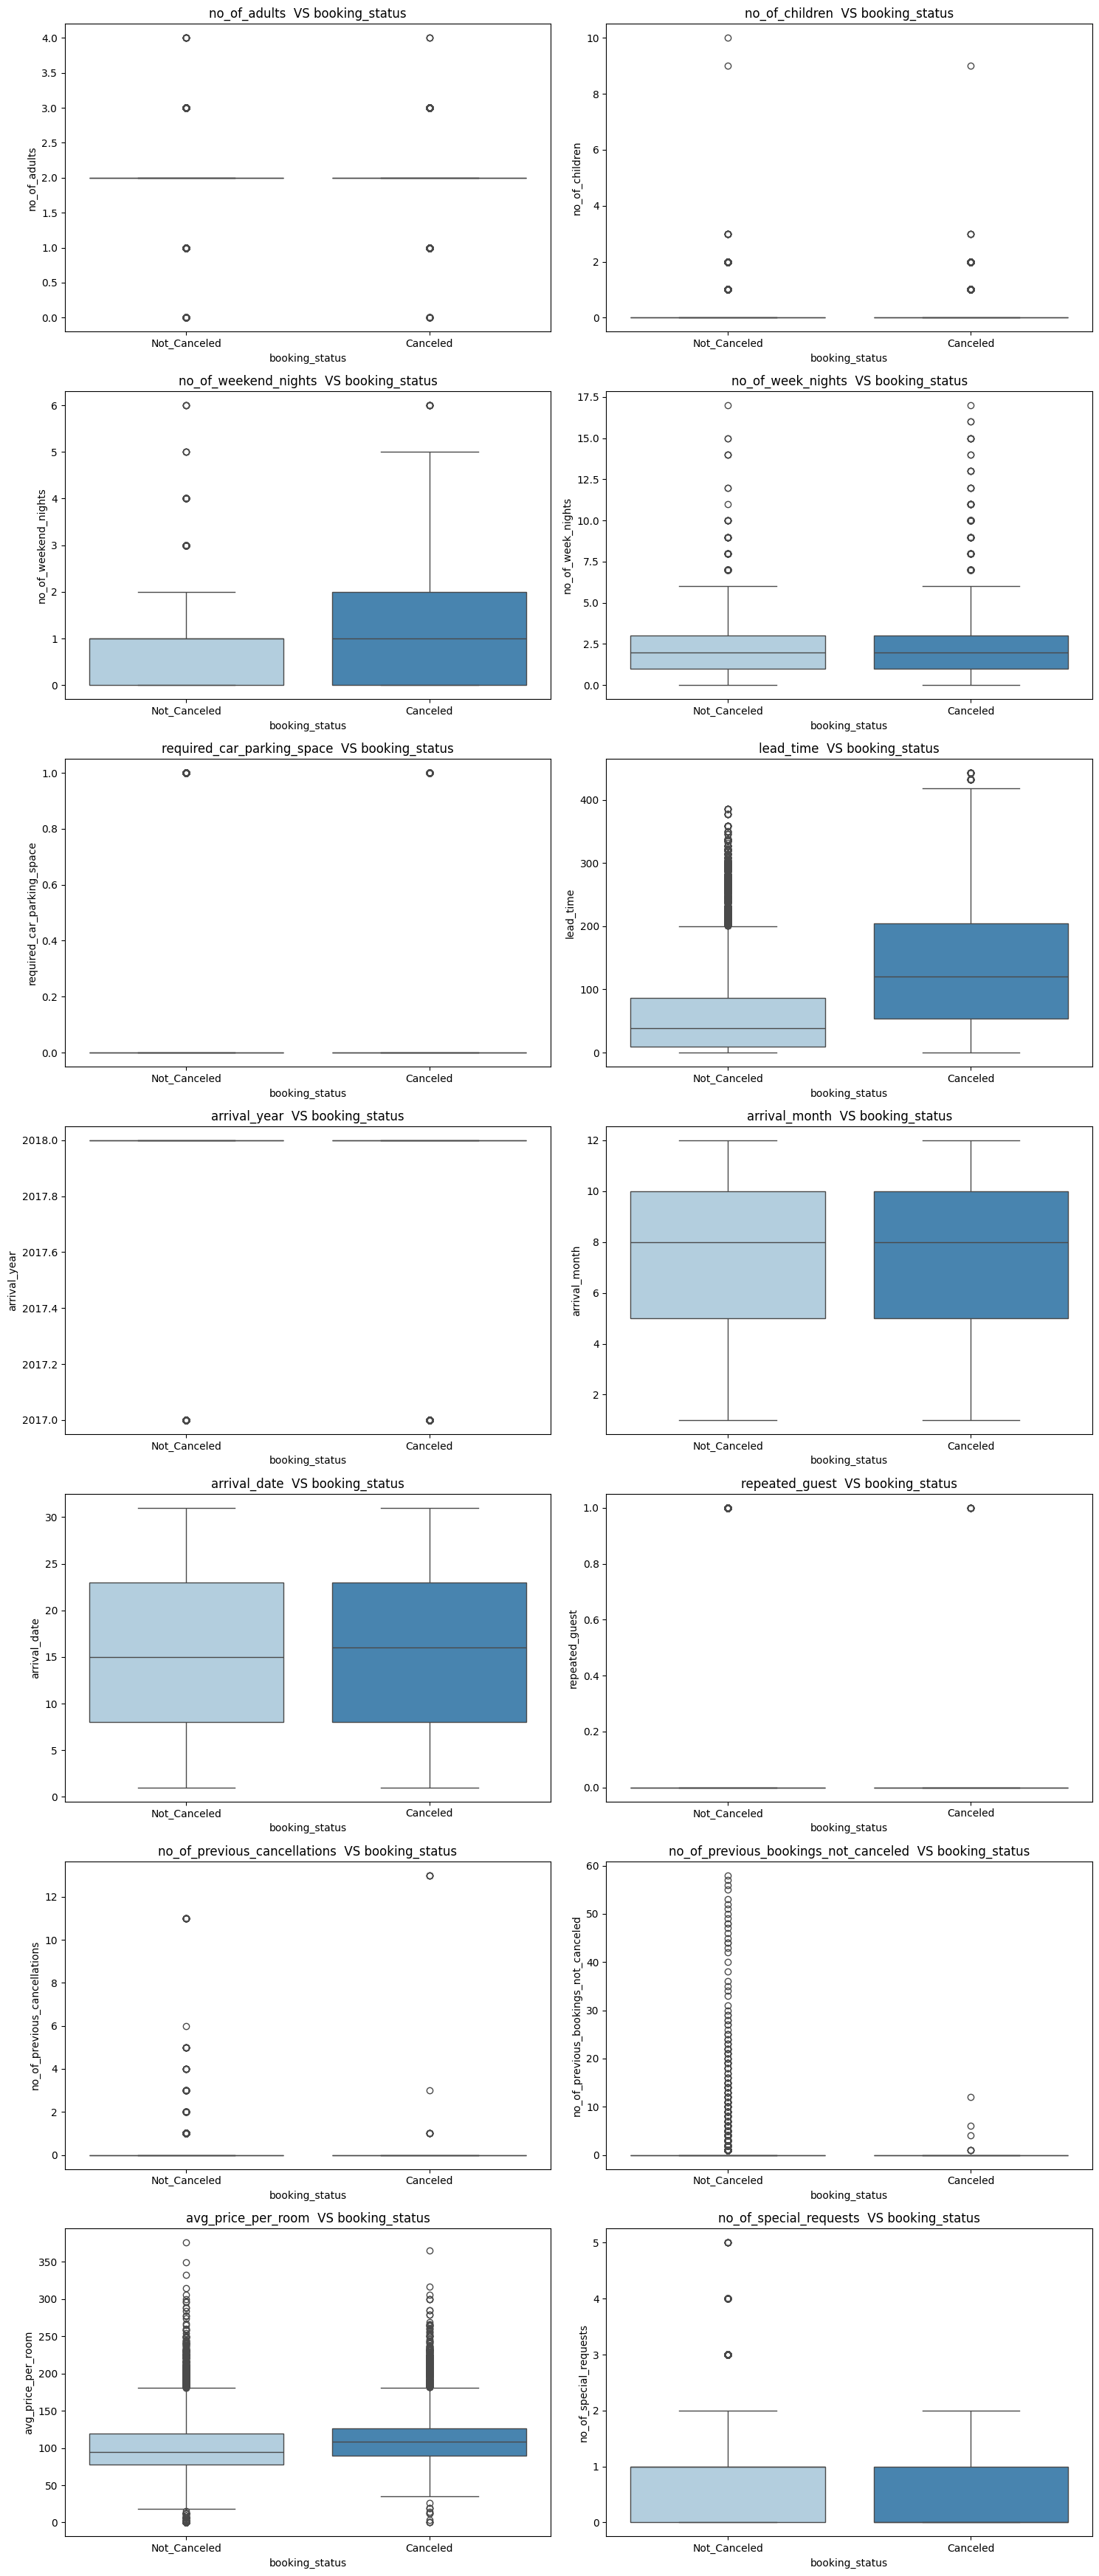

In [18]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

plot_bivariate_num(df, 'booking_status', numerical_columns)

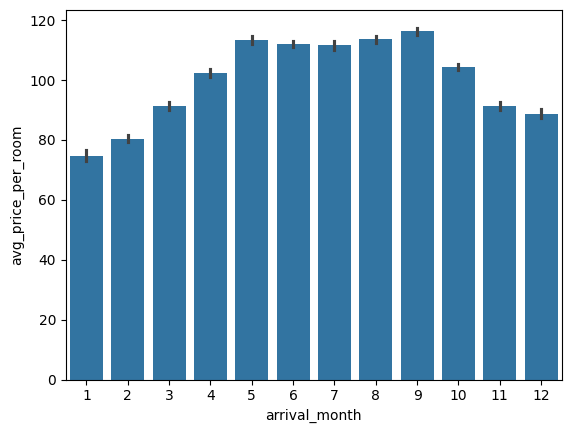

In [19]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=df)
plt.show()

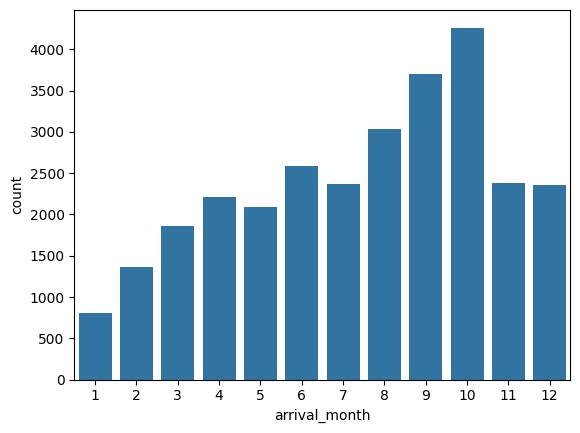

In [20]:
sns.countplot(x='arrival_month', data=df)
plt.show()

- Hotels tend to increase their prices during periods of high customer demand.

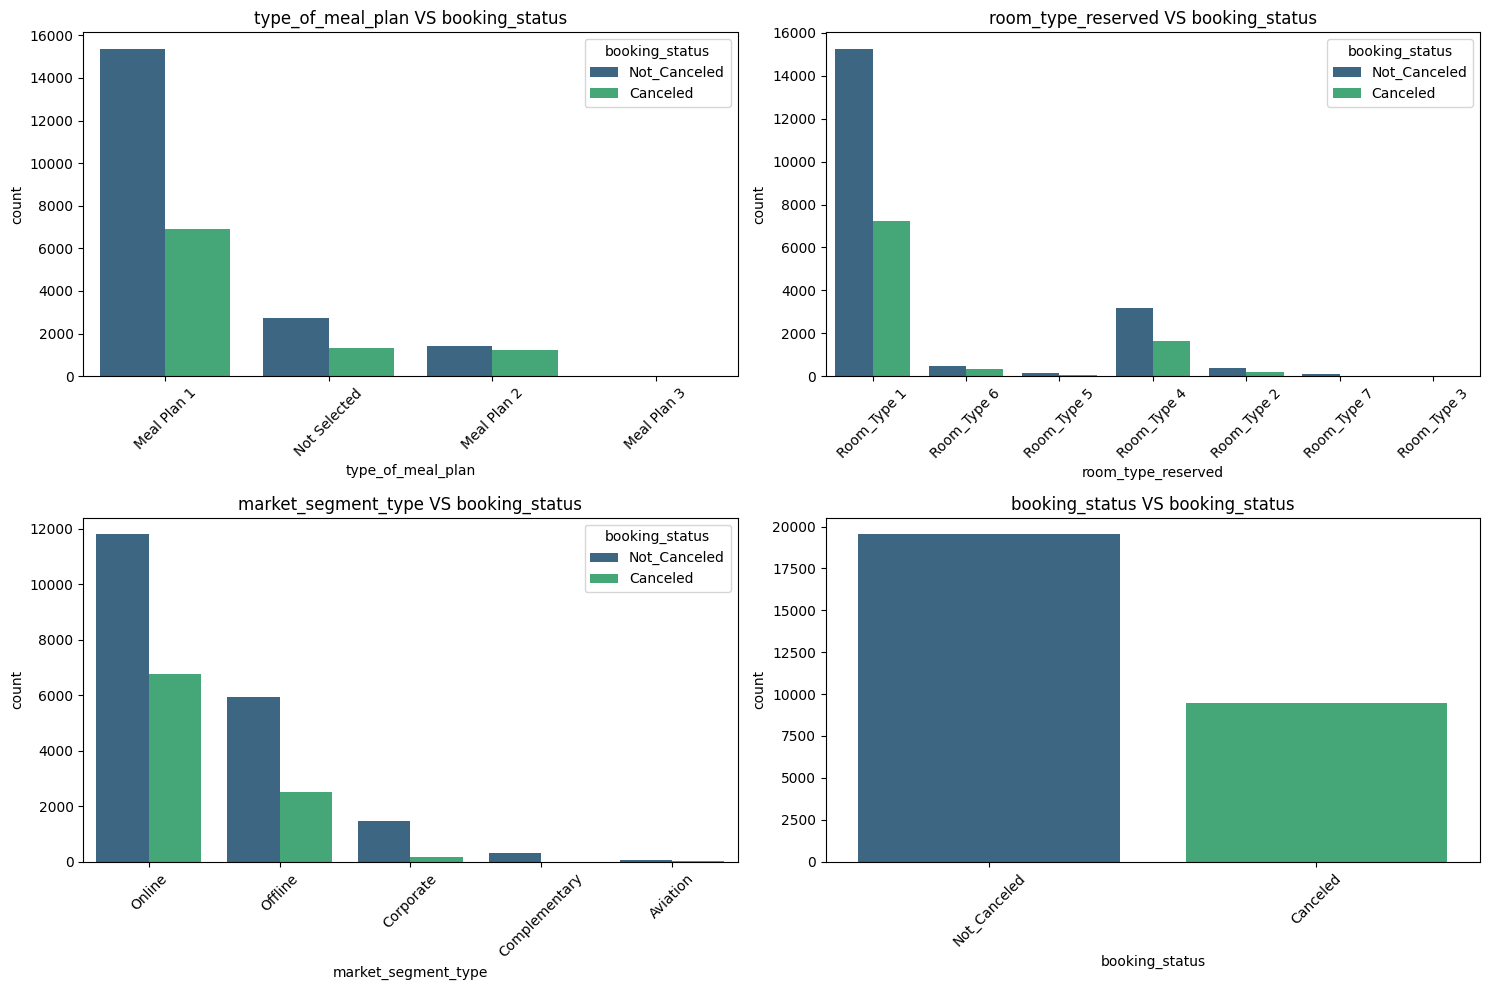

In [21]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="viridis" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=45)

    plt.tight_layout()
    plt.show()

plot_bivaraite_cat(df, 'booking_status', categorical_columns)

### Data Processing

In [22]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mappings={}

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [23]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [24]:
# Skewness

skewness  = df.skew()

skewness

no_of_adults                            -0.340838
no_of_children                           4.844412
no_of_weekend_nights                     0.719426
no_of_week_nights                        1.542808
type_of_meal_plan                        1.806612
required_car_parking_space               5.323647
room_type_reserved                       1.729866
lead_time                                1.289144
arrival_year                            -1.669774
arrival_month                           -0.346711
arrival_date                             0.027335
market_segment_type                     -1.670290
repeated_guest                           5.985562
no_of_previous_cancellations            24.940984
no_of_previous_bookings_not_canceled    19.509733
avg_price_per_room                       0.623772
no_of_special_requests                   1.150448
booking_status                          -0.741025
dtype: float64

In [25]:
# Handling Skewness
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [26]:
# Handling Imbalanced Data

df['booking_status'].value_counts()

booking_status
1    19551
0     9469
Name: count, dtype: int64

In [27]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X, y)

y_resample.value_counts()

booking_status
1    19551
0    19551
Name: count, dtype: int64

In [33]:
balanced_df = pd.DataFrame(X_resample , columns=X.columns)
balanced_df["booking_status"] = y_resample
df = balanced_df.copy()
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0.0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0.0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0.0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0.0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0.0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


### Feature Selection

In [34]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns='booking_status')
y = df["booking_status"]

model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [35]:
feature_importance = model.feature_importances_

In [37]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,10,17,4,1,2,2017,2,1
1,98,121.50,2,7,16,4,1,1,2018,2,1
2,433,70.00,0,9,8,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,6,15,3,2,0,2018,1,0


In [38]:
df = top_10_df.copy()

### Model Selection

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

X = df.drop(columns='booking_status')
y = df["booking_status"]

# Train test split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


metrics_df= pd.DataFrame(metrics)

metrics_df

[LightGBM] [Info] Number of positive: 15649, number of negative: 15632
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 582
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500272 -> initscore=0.001087
[LightGBM] [Info] Start training from score 0.001087


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.914333,0.909944,0.919272,0.914584
1,LogisticRegression,0.791842,0.799526,0.777806,0.788516
2,Gradient Boosting,0.841452,0.844283,0.836494,0.840371
3,Suuport vector classifier,0.695180,0.661078,0.798309,0.723241
4,Decsion Tree,0.881984,0.884189,0.878524,0.881347
5,KNN,0.832119,0.857498,0.795746,0.825469
6,Naive Bayes,0.755019,0.775527,0.716299,0.744738
7,XGboost,0.896944,0.895100,0.898770,0.896931
8,Adaboost,0.809999,0.816562,0.798565,0.807463
9,LGBM,0.887610,0.881403,0.895182,0.888239


In [40]:
# Training Random Forest Model

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

X = df.drop(columns='booking_status')
y = df["booking_status"]

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

rf = RandomForestClassifier(random_state=42)

params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   9.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  15.7s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  16.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  16.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027DE0EF3C50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027DE0EF3B60>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027DE0EF3D70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000027DE0EF3F80>},
                   random_state=42, scoring='accuracy', verbose=2)

In [42]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [43]:
best_rf_model = random_search.best_estimator_

In [44]:
y_pred = best_rf_model.predict(X_test)

In [46]:
print("accuracy : ", accuracy_score(y_test,y_pred),  "\n")
print("precision: ", precision_score(y_test,y_pred),  "\n")
print("recall : ", recall_score(y_test,y_pred),  "\n")
print("F1 Score : ", f1_score(y_test,y_pred),  "\n")

accuracy :  0.9112645441759366 

precision:  0.9050505050505051 

recall :  0.9185033316248078 

F1 Score :  0.9117272958534725 

